# Part II - (Prosper Loan Data Exploration)
## by (Gabriel Ogih)

## Investigation Overview


This investigation will focus on features in th prosper_loan dataset that can be used to predict interest rate. our main focus is on ProsperScore, ProsperRating, ListingCategory, EmploymentStatus, and IncomeRange. below is a summary of key insight derived from our exploration of the dataset.

- The BorrowerRate/interest rate shows a strong negative relationship with ProsperScore variables. This is expected since ProsperScore and CreditScoreRangeLower measures risk/probality of the loan going bad or past the due date. Interest rate also has a negative correlation to LoanOriginalAmount albert not so strong. although this was not explored expensively in this analysis.

- individual with earnings above 50k receive the least BorrowersRate for all income ranges (evident by the movement of the dark color to lower left in the heatmap for IncomeRange upward of $50k).

- In exploring the relationship between our variable of interest (BorrowerRate) and other categorical variable we see a steady decline in BorrowersRate for increased ProsperRating which also has a strong positive correlation with ProsperScore.

- finally, out of job individuals recorded the hightest median BorrowersRate across all available employment statuses. They have the least median ProsperScore alongside self employed individuals and people with no specified employement status.


## Dataset Overview

The dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
To ensure quality and tidy data; I converted ListingCreationDate, LoanStatus, EmploymentStatus, ListingCategory, IncomeRange, LoanNumber, and MemberKey to appropriate data types. I also dropped variable/features not relevant to our analysis (only 15 features were considered in our exploration). finally, to address issue of missing values, only loan records after july 2009 were considered.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosper_loan = pd.read_csv("prosperLoanData.csv")
columns = ['ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ProsperScore',
          'ListingCategory (numeric)', 'EmploymentStatus', 'EmploymentStatusDuration', 'CreditScoreRangeLower', 'DebtToIncomeRatio',
          'IncomeRange', 'LoanNumber', 'LoanOriginalAmount', 'MemberKey', 'Recommendations']
prosper_loan = prosper_loan[columns]


In [3]:
# rename columns for ease of use
prosper_loan = prosper_loan.rename(columns={'ProsperRating (Alpha)': 'ProsperRating', 'ListingCategory (numeric)': 'ListingCategory'})

In [4]:
# convert columns to appropriate data types
# convert ListingCreationDate to datetime
prosper_loan['ListingCreationDate'] = pd.to_datetime(prosper_loan.ListingCreationDate, format='%Y-%m-%d')

# convert LoanStatus, EmploymentStatus, ListingCategory to unordered category type 
convert_columns = ['LoanStatus', 'EmploymentStatus', 'ListingCategory', 'IncomeRange', 'LoanNumber', 'MemberKey']
for col in convert_columns:
    prosper_loan[col] = prosper_loan[col].astype('category')

# convert ProsperRating to ordered category type
if int(pd.__version__.split(".")[0]) > 0 or int(pd.__version__.split(".")[1]) >= 23:
    ratings = ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
    ratingsClass = pd.api.types.CategoricalDtype(ordered=True, categories=ratings)
    prosper_loan['ProsperRating'] = prosper_loan.ProsperRating.astype(ratingsClass)
else:
    prosper_loan['ProsperRating'] = prosper_loan.ProsperRating.astype('category', ordered=True)

## Distribution of BorrowerRate

The distribution of the interest rate is slightly skewed to the right with interest of around 0.15% occuring the most for loans in the dataset. interestingly, there is a steep jump in frequency for 0.3% interest rate and slighly higher.


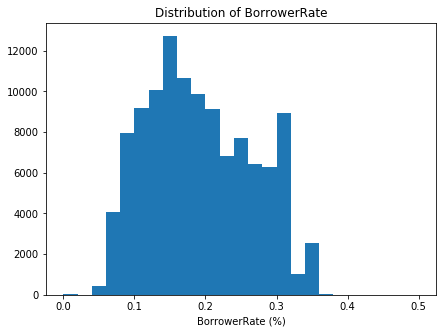

In [5]:
# plot distributions of numerical variable
# distributions of borrowers rate.
binsize = 0.02
bins = np.arange(0, prosper_loan['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[7, 5])
plt.hist(data = prosper_loan, x = 'BorrowerRate', bins = bins)
plt.xlabel('BorrowerRate (%)')
plt.title('Distribution of BorrowerRate')
plt.show()

## Distribution of ProsperScore

The ProsperScore is a risk indicatior with higher values signifying lower risk. Most of the loans in the dataset have ProsperScore between 4.0 and 8.0. only a small number of loan have prosper score 1.0 and are considered high risk. since prosper score is a discrete variable we depict the distribution using seaborn countplot.

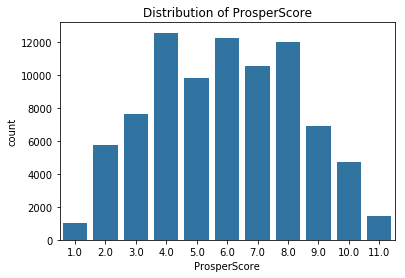

In [6]:
base_color = sb.color_palette()[0]
sb.countplot(data=prosper_loan, x='ProsperScore', color= base_color);
plt.title('Distribution of ProsperScore')
plt.show()

## BorrowerRate vs ProsperScore

The borrower/interest rate shows a strong negative relationship with ProsperScore and CreditScoreRangeLower variables as expected (since they indicate risk). The higher the risk (low ProsperScore) the higher the interest rate.


In [7]:
# selecting outliers based on observation from the above distributions.
outliers = (prosper_loan['CreditScoreRangeLower'] < 450) | (prosper_loan['CreditScoreRangeLower'] > 950)

# removing outliers from the dataset
prosper_loan = prosper_loan[prosper_loan.ListingCreationDate >= '2009-08-01']

Text(0.5,1,'BorrowerRate vs ProsperScore')

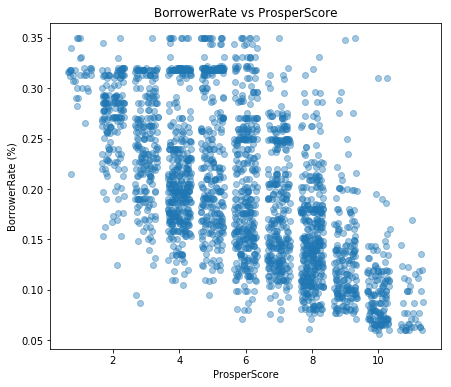

In [8]:
# generate sample of dataset to avoid overploting
prosper_loan_samp1 = prosper_loan.sample(n=2500, replace = False)

# scatter plot for borrowerRate vs ProsperScore
plt.figure(figsize=[7, 6])
sb.regplot(data=prosper_loan_samp1, x='ProsperScore', y='BorrowerRate', x_jitter=0.35, fit_reg=False, scatter_kws={'alpha': 0.4})
plt.ylabel('BorrowerRate (%)');
plt.title('BorrowerRate vs ProsperScore')

## BorrowerRate and ProsperScore by ProsperRating, IncomeRange

ProsperRating has a strong negative relationship with BorrowersRate and a strong positive correlation with ProsperScore. there is a steady decline in BorrowersRate for increased ProsperRating.
Also, individuals with earnings above $50k receive the least median BorrowersRate for all income ranges. ProsperScore for these individuals increased with increasing incomeRange.

Text(0,0.5,'IncomeRange ($)')

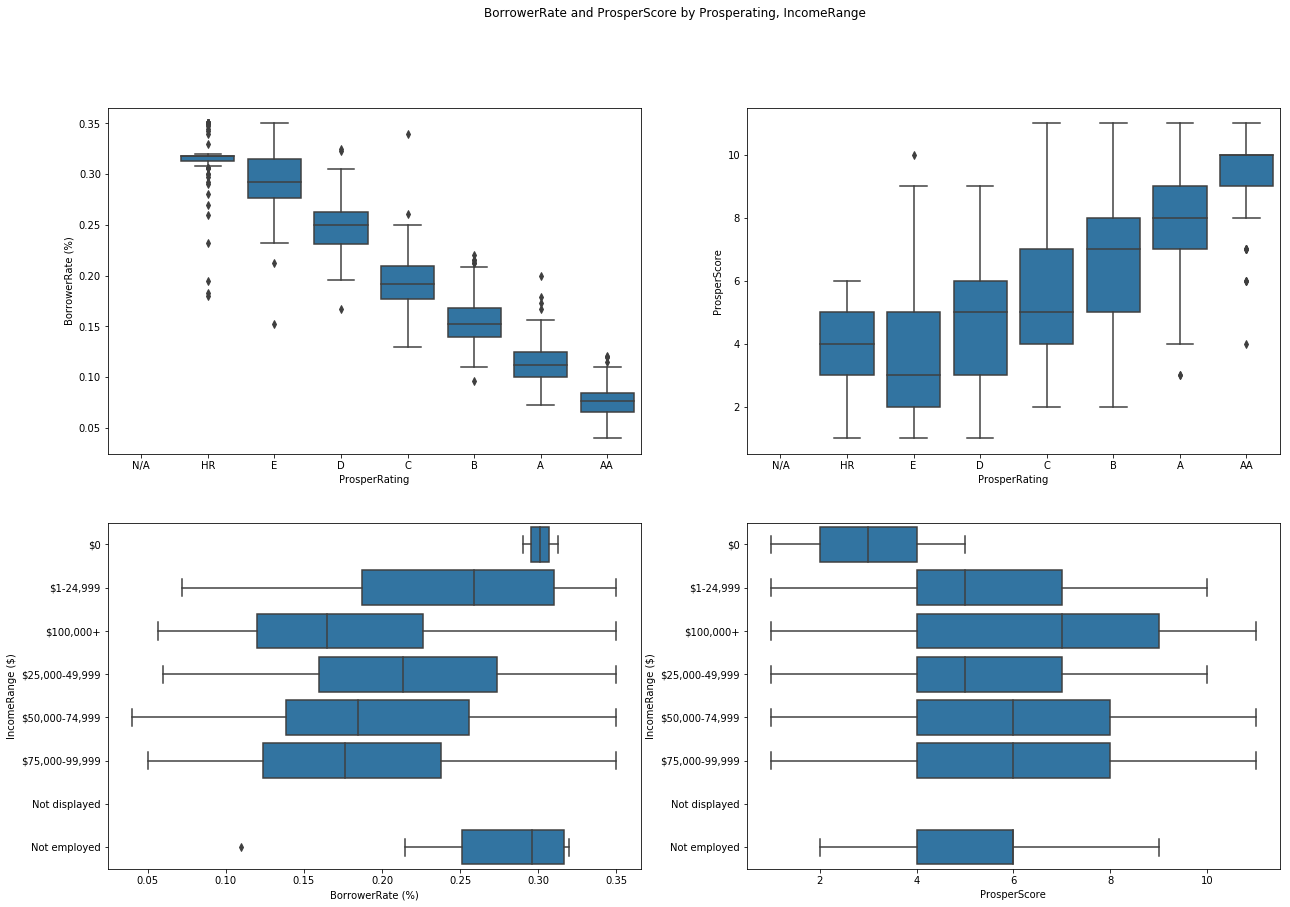

In [9]:
# generate sample of dataset to avoid overploting
prosper_loan_samp1 = prosper_loan.sample(n=2500, replace = False)

fig, ax = plt.subplots(ncols = 2, nrows = 2 , figsize = [21,14])

num_var=['BorrowerRate', 'ProsperScore']
catigorical_vars = ['ProsperRating', 'IncomeRange']
# iterate and plot boxplot for pair-wise relationship between Borrowers rate, ProsperScore and the categorical variables
for i in range(len(num_var)):
    for j in range(len(catigorical_vars)):
        var = catigorical_vars[j]
        if j != len(catigorical_vars) - 1:
            sb.boxplot(data = prosper_loan_samp1, x = var, y = num_var[i], ax = ax[j,i],
                   color = base_color)
        else:
            sb.boxplot(data = prosper_loan_samp1, x =num_var[i] , y = var, ax = ax[j,i],
                   color = base_color)
fig.suptitle('BorrowerRate and ProsperScore by Prosperating, IncomeRange')
ax[0,0].set_ylabel('BorrowerRate (%)')
ax[1,0].set_ylabel('IncomeRange ($)')
ax[1,0].set_xlabel('BorrowerRate (%)')
ax[1,1].set_ylabel('IncomeRange ($)')

## BorrowerRate vs ProsperScore for levels fo ProsperRating.

The multivariate visualization of the variables of interest for levels of the categorical variable (ProsperRating) show a clear interaction of the ProsperRating with the relationship between BorrowerRate and ProsperScore. For a given ProsperScore the BorrowerRate (interest rate) declines with increasing Prosperrating. from the plot, higher ratings of A, AA have very low interest rate of about 10%

In [10]:
def plot_scatter(data, char_var, marker_list):
    """Plot scatter plot with shape encoding for a third variable"""
    for cat, marker in marker_list: 
        category = data.loc[data[char_var]==cat]
        sb.regplot(data=category, x='ProsperScore', y='BorrowerRate', marker=marker, x_jitter=0.3, fit_reg=False)

Text(0,0.5,'BorrowerRate (%)')

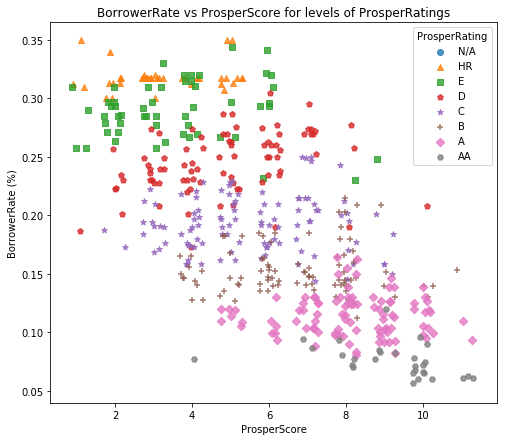

In [11]:
#subplot1: scatter plot of BorrowerRate vs ProsperScore for levels of ProsperRating variable
# specify makers for encoding
plt.figure(figsize=[8,7])
L_samp = prosper_loan.sample(n=500, replace=False)
cat_maker = [['N/A', 'o'], ['HR', '^'], ['E', 's'], ['D', 'p'], ['C', '*'], ['B', '+'], ['A', 'D'], ['AA', 'H']]
plot_scatter(L_samp, 'ProsperRating', cat_maker)
plt.legend(['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'], title='ProsperRating')
plt.title("BorrowerRate vs ProsperScore for levels of ProsperRatings")
plt.ylabel('BorrowerRate (%)')

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 540437 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
